In [ ]:
## Predicting Student Scores Based on Study from scratch

# from google.colab import files
# files.download("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
### he error is because files.download() in Google Colab is meant
### for downloading local files from your Colab environment to your computer

## load the dataset from the URL into a DataFram
import pandas as pd
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print(df.head)
df.to_csv("student_scores.csv", index=False) #tells Pandas not to include the index column, so the output
# from google.colab import files # then we can donload to local syatem
# files.download("student_scores.csv")
df


<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


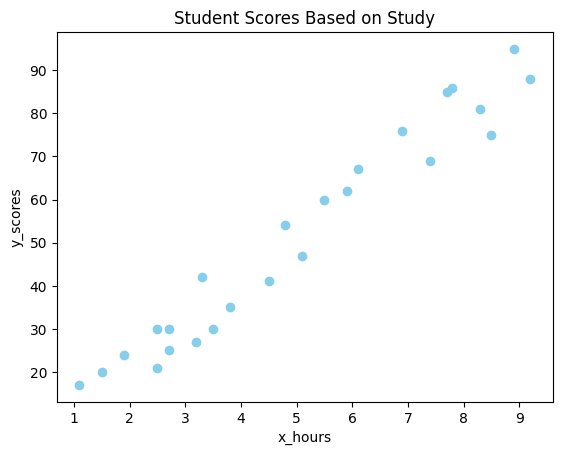

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["Hours"],df["Scores"], color="skyblue",marker="o")
# plt.bar , plt.pie(), plt.hist(), plt.plot()
plt.xlabel("x_hours")
plt.ylabel("y_scores")
plt.title("Student Scores Based on Study")
plt.show()

In [ ]:
'''     🧩 Key Steps:

    Load the data using csv or manually define it.

    Visualize the data using matplotlib (optional).

    Implement the regression logic:

        Calculate mean and variance

        Compute slope (m) and intercept (b) using the least squares method

        Predict values using y = mx + b

    Evaluate using Mean Squared Error (MSE)

    Plot the regression line over the data points
'''

In [ ]:
##implementing gradient descent from scratch to minimize Mean Squared Error (MSE)
## Model: y=mx+by = mx + b

## Loss Function: Mean Squared Error (MSE)

## Optimization: Gradient Descent (epoch by epoch)

In [ ]:
hours = []
scores = []

with open("student_scores.csv", "r") as file:
  lines = file.readlines()
for line in lines[1:]:
  #print(line)
  _ ,x, y = line.strip().split(",") #Removes any leading or trailing whitespace characters from the string line
  #print(x,y)
  hours.append(float(x))
  scores.append(float(y))



2.5 21
5.1 47
3.2 27
8.5 75
3.5 30
1.5 20
9.2 88
5.5 60
8.3 81
2.7 25
7.7 85
5.9 62
4.5 41
3.3 42
1.1 17
8.9 95
2.5 30
1.9 24
6.1 67
7.4 69
2.7 30
4.8 54
3.8 35
6.9 76
7.8 86


In [ ]:
# Step 2: Implement Gradient Descent
# initialize hyperparameters

#training loop
def train ():
  m = 0
  b = 0
  learning_rate = 0.01
  epochs = 1000
  n = len(hours)
  for epoch in range(epochs):
    total_error = 0
    dm = 0
    db = 0
    for x, y in zip(hours, scores):
      y_pred = m*x + b
      error = y_pred - y
      total_error+= error ** 2

      #Gradients
      dm += 2 * x * error
      db += 2*error

    #update parameters
    m -= learning_rate * dm / n
    b -= learning_rate * db / n
    if epoch % 100 == 0:
      mse = total_error / n
      print(f"Epoch {epoch}: MSE = {mse:.2f}, m = {m:.4f}, b ={b:.4f}")
  return m,b

In [ ]:
m, b = train()

Epoch 0: MSE = 3264.04, m = 6.3571, b =1.0296
Epoch 100: MSE = 28.95, m = 9.8726, b =1.8840
Epoch 200: MSE = 28.92, m = 9.8418, b =2.0747
Epoch 300: MSE = 28.90, m = 9.8208, b =2.2047
Epoch 400: MSE = 28.89, m = 9.8065, b =2.2934
Epoch 500: MSE = 28.89, m = 9.7967, b =2.3539
Epoch 600: MSE = 28.88, m = 9.7901, b =2.3952
Epoch 700: MSE = 28.88, m = 9.7855, b =2.4233
Epoch 800: MSE = 28.88, m = 9.7824, b =2.4425
Epoch 900: MSE = 28.88, m = 9.7803, b =2.4556


In [ ]:
def predict(x):
    return m * x + b

# Example prediction
study_hours = 6.0
predicted_score = predict(study_hours)
print(f"Predicted score for {study_hours} hours of study: {predicted_score:.2f}")


Predicted score for 6.0 hours of study: 61.14


In [ ]:
## ## Predicting Student Scores Based on Study using a built-in package
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Load your CSV
df = pd.read_csv("student_scores.csv")
X = df[["Hours"]]  # Features must be 2D
y = df["Scores"]

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Get parameters
m = model.coef_[0]      # Slope
b = model.intercept_    # Intercept
print(f"Model: y = {m:.4f}x + {b:.4f}")

# Predict score for 6.0 hours
# Predict using a DataFrame with the same column name as training
predicted = model.predict(pd.DataFrame({"Hours": [6.0]}))
print(f"Predicted score for 6.0 hours of study: {predicted[0]:.2f}")

Model: y = 9.7758x + 2.4837
Predicted score for 6.0 hours of study: 61.14


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
# load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
#preview
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
print(df.info())
print(df.describe())
print(df.corr())  # Optional: see feature relationships

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [ ]:
'''0   MedInc     Median income of households in the area
 1   HouseAge
 2   AveRooms
 3   AveBedrms
 4   Population
 5   AveOccup  So if a block has 1,000 people and 250 households(khanevar), AveOccup would be 4.
 6   Latitude # location of house
 7   Longitude  #   Location coordinates
 8   target      '''




In [ ]:
'''
This code is detecting outliers in the AveOccup column using the Interquartile Range (IQR)
method, which is a common statistical technique. Here's a breakdown of what each line does:'''
Q1 = df['AveOccup'].quantile(0.25)
Q3 = df['AveOccup'].quantile(0.75)
#print(Q1,Q3)
##Q1 is the 25th percentile (lower quartile)
##Q3 is the 75th percentile (upper quartile)
IQR = Q3 - Q1
#The IQR measures the spread of the middle 50% of the data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
## Any value below lower_bound or above upper_bound is considered an outlier
outliers = df[(df['AveOccup'] < lower_bound)|(df['AveOccup'] > upper_bound)]

median_value = df['AveOccup'].median()
df.loc[(df['AveOccup'] > upper_bound) | (df['AveOccup'] < lower_bound), 'AveOccup'] = median_value
print(df['AveOccup'].min(), df['AveOccup'].max()) ##1–5 people per household), which makes sense.

1.277467411545624 4.353070175438597


In [ ]:
print(df.info())
print(df.describe())
print(df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [ ]:
'''    MedInc — strongest predictor

    AveRooms — useful, especially with AveBedrms

    HouseAge — adds some signal

    Latitude & Longitude — useful for location-based modeling

    AveOccup — keep, but consider transforming or capping outliers

❌ Consider Dropping:

    Population — very weak signal

    AveBedrms — redundant with AveRooms

    Bonus Tip: Create New Features

You could engineer features like:

    RoomPerPerson = AveRooms / Population

    BedRoomRatio = AveBedrms / AveRooms

    IncomePerOccupant = MedInc / AveOccup'''


In [40]:
# Room-to-Bedroom Ratio: helps detect luxury or cramped housing
df['RoomBedRatio'] = df['AveRooms'] / df['AveBedrms']

# Room per Person: how spacious the housing is
df['RoomPerPerson'] = df['AveRooms'] / df['Population']

# Income per Occupant: economic density
df['IncomePerOccupant'] = df['MedInc'] / df['AveOccup']

# Age-Weighted Income: older neighborhoods with higher income
df['AgeIncomeInteraction'] = df['HouseAge'] * df['MedInc']

# Latitude-Longitude Interaction: spatial clustering
df['GeoCluster'] = df['Latitude'] * df['Longitude']

# Drop original columns that are now represented by engineered features
df.drop(columns=[
    'AveRooms',        # replaced by RoomBedRatio and RoomPerPerson
    'AveBedrms',       # replaced by RoomBedRatio
    'Population',      # used in RoomPerPerson
    'MedInc',          # used in IncomePerOccupant and AgeIncomeInteraction
    'AveOccup',        # used in IncomePerOccupant
    'HouseAge',        # used in AgeIncomeInteraction
    'Latitude',        # used in GeoCluster
    'Longitude'        # used in GeoCluster
], inplace=True)


In [41]:
df

,target,RoomBedRatio,RoomPerPerson,IncomePerOccupant,AgeIncomeInteraction,GeoCluster
0,4.526,6.821705,0.021690,3.257687,341.3332,-4630.0724
1,3.585,6.418626,0.002598,3.934608,174.3294,-4627.2492
2,3.521,7.721053,0.016710,2.589838,377.3848,-4626.7840
3,3.413,5.421277,0.010425,2.214765,293.4412,-4627.1625
4,3.422,5.810714,0.011118,1.763125,200.0024,-4627.1625
...,...,...,...,...,...,...
20635,0.781,4.451872,0.005971,0.609348,39.0075,-4780.6332
20636,0.771,4.646667,0.017174,0.818751,46.0224,-4786.5829
20637,0.923,4.647423,0.005169,0.730983,28.9000,-4779.7046
20638,0.847,4.547677,0.007192,0.879423,33.6096,-4783.6476


In [42]:
## Some features like GeoCluster have large magnitudes. Scaling helps models like linear regression or gradient descent converge better.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns='target'))
X_scaled  ##Standardize features by removing the mean and scaling to unit variance. z = (x - u) / s



array([[ 1.56804217,  0.22717824,  2.46244146,  3.13673961, -1.12883099],
       [ 1.22406099, -0.11040749,  3.37457641,  0.89160066, -1.12011463],
       [ 2.33552929,  0.13912226,  1.562531  ,  3.62140434, -1.11867837],
       ...,
       [-0.28745256, -0.06494239, -0.94223295, -1.06349984, -1.59080636],
       [-0.37257354, -0.02917159, -0.74221302, -1.00018567, -1.60298   ],
       [-0.39525079, -0.08935831, -0.69733182, -0.93823738, -1.57078206]])

In [44]:
## LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = X_scaled
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")


Test MSE: 0.5493


In [ ]:
'''Polynomial regression shines when:

    You have smooth, curved relationships

    You want to keep things interpretable

    You’re working with a few features

But it struggles when:

    The data is noisy or irregular

    You have complex interactions between features
    If most plots show smooth curves, go for Polynomial Regression (degree 2 or 3).

If plots are chaotic or nonlinear in unpredictable ways, switch to XGBoost or
Random Forest—they’ll capture those patterns without needing manual feature engineering.

    '''


In [45]:
##1. Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Degree 2 or 3 adds curvature
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Polynomial Regression MSE: {mse:.4f}")

##🧠 In this case, adding complexity with a degree-3 polynomial actually hurt performance.


Polynomial Regression MSE: 2.7439


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Create a pipeline: PolynomialFeatures + Ridge Regression
model = make_pipeline(
    PolynomialFeatures(degree=3),  # You can try degree=2 if 3 is too complex
    Ridge(alpha=1.0)               # Regularization strength; try 0.1, 1.0, 10.0
)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Regularized Polynomial Regression MSE: {mse:.4f}")


Regularized Polynomial Regression MSE: 2.7377


In [47]:
for alpha in [0.01, 0.1, 1.0, 10.0]:
    model = make_pipeline(PolynomialFeatures(degree=3), Ridge(alpha=alpha))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Alpha={alpha} → MSE: {mse:.4f}")


Alpha=0.01 → MSE: 2.7439
Alpha=0.1 → MSE: 2.7433
Alpha=1.0 → MSE: 2.7377
Alpha=10.0 → MSE: 2.6828


In [ ]:
'''
Your data likely has linear or mildly nonlinear relationships that are better captured by simpler models.

Polynomial regression—even regularized—is not the best fit for this dataset.

Time to pivot to nonlinear models that don’t rely on polynomial expansion, like:

    ✅ Random Forest

    ✅ XGBoost

    ✅ Support Vector Regression (SVR) with RBF kernel'''